In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd
import plotly.express as px
import random
from sklearn.preprocessing import MinMaxScaler

sys.path.append(os.path.abspath('../src/'))
from ActivationFunctions import *
from NeuralNetwork import *
from MyUtils import *

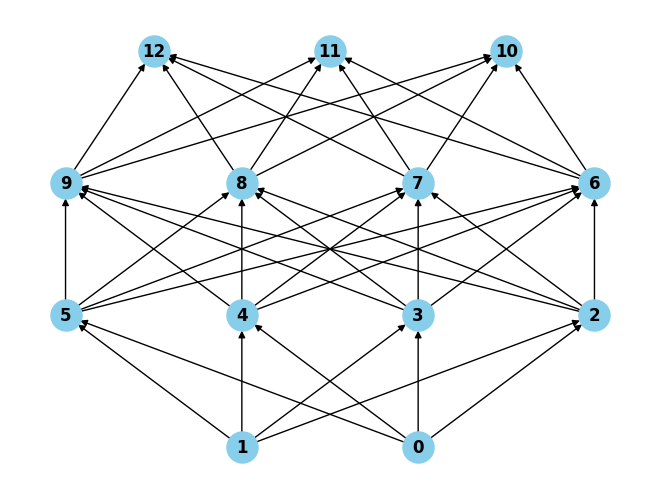

In [6]:
TR_INPUT = 2
TR_OUTPUT = 3
topology = create_stratified_topology([TR_INPUT,4, 4,TR_OUTPUT])
NeuralNetwork.display_topology(topology)

In [7]:
topology

{0: ['input_0', None, [], [2, 3, 4, 5]],
 1: ['input_0', None, [], [2, 3, 4, 5]],
 2: ['hidden_1', 'sigmoid', [1], [6, 7, 8, 9]],
 3: ['hidden_1', 'sigmoid', [1], [6, 7, 8, 9]],
 4: ['hidden_1', 'sigmoid', [1], [6, 7, 8, 9]],
 5: ['hidden_1', 'sigmoid', [1], [6, 7, 8, 9]],
 6: ['hidden_2', 'sigmoid', [1], [10, 11, 12]],
 7: ['hidden_2', 'sigmoid', [1], [10, 11, 12]],
 8: ['hidden_2', 'sigmoid', [1], [10, 11, 12]],
 9: ['hidden_2', 'sigmoid', [1], [10, 11, 12]],
 10: ['output_3', 'identity', [], []],
 11: ['output_3', 'identity', [], []],
 12: ['output_3', 'identity', [], []]}

In [9]:
NN = NeuralNetwork(topology, -0.75, 0.75, True, RANDOM_STATE)

AttributeError: 'OutputNeuron' object has no attribute 'extend_successors'

In [ ]:
len_dataset = 1200
len_training = 1000
len_validation = 200

f1 = lambda x : -3*x[0] + x[1] + 3
f2 = lambda x : 3*x[0]**3 - 10*x[1]**2 + 2
f3 = lambda x : 2*math.log(x[0]*5) - 2*math.log(x[1]*5) + 1

dummy = create_dataset(len_dataset, TR_INPUT, [-10, 10], 
                      [f1,
                       f2,
                       f3],
                      RANDOM_STATE)

tr_df = dummy[:len_training]
val_df = dummy[-len_validation:]
tr_df.sample(10, random_state=RANDOM_STATE)

,input_1,input_2,input_3,output_1,output_2,output_3
144,-9.507814,-7.065543,7.989526,24.457899,-3075.696144,-6.583832
833,4.901076,3.983327,-0.217138,-7.719901,196.510629,10.667265
270,-4.355442,-7.950446,-2.506105,8.115881,-877.962613,-12.811994
468,5.651247,-8.446045,-4.519016,-22.399786,-169.912138,-5.313815
962,-6.966656,-2.704203,-6.671284,21.195766,-1085.492562,-14.342143
186,-1.838356,-6.304518,4.251111,2.210549,-414.107906,-1.891763
942,-2.711445,-3.392900,-6.262313,7.741434,-172.920793,-10.366658
516,-5.454023,5.195639,8.192003,24.557707,-754.658667,9.933619
286,-9.964158,3.738099,-5.053696,36.630572,-3105.591329,-9.279755
458,-9.266937,3.344150,-4.584328,34.144959,-2497.258832,-8.507115


In [ ]:
scaler_out = MinMaxScaler()
scaler_in = MinMaxScaler()
scaler_in.fit(tr_df.values[:,:TR_INPUT])
scaler_out.fit(tr_df.values[:,TR_INPUT:])

tr_normalized = np.empty((len_training, TR_OUTPUT+TR_INPUT))
tr_normalized[:,:TR_INPUT] = scaler_in.transform(tr_df.values[:,:TR_INPUT])
tr_normalized[:,TR_INPUT:] = scaler_out.transform(tr_df.values[:,TR_INPUT:])

val_normalized = np.empty((len_validation, TR_OUTPUT+TR_INPUT))
val_normalized[:,:TR_INPUT] = scaler_in.transform(val_df.values[:,:TR_INPUT])
val_normalized[:,TR_INPUT:] = scaler_out.transform(val_df.values[:,TR_INPUT:])

In [ ]:
tr_df_normalized = pd.DataFrame(data = tr_normalized, columns=tr_df.columns)
val_df_normalized = pd.DataFrame(data = val_normalized, columns=tr_df.columns)

In [ ]:
training_set = tr_df.values
validation_set = val_df.values

batch_size = 100
max_epochs = 1000
error_decrease_tolerance = 0.0001
patience = 5

learning_rate = 0.01/batch_size
lambda_tikhonov = 0
alpha_momentum = 0

stats = NN.train(tr_normalized, val_normalized, batch_size, max_epochs, error_decrease_tolerance, patience, 
                   learning_rate, lambda_tikhonov, alpha_momentum)

In [ ]:
tr_predictions_normalized = NN.predict_array(tr_normalized[:,:TR_INPUT])
tr_predictions = scaler_out.inverse_transform(tr_predictions_normalized)

In [ ]:
pd.options.mode.chained_assignment = None
tr_df[['prediction_1', 'prediction_2', 'prediction_3']] = tr_predictions
for col in ['prediction_1', 'prediction_2', 'prediction_3']:
    tr_df[col + '_err'] = (tr_df[col] - tr_df['output_' + col[-1]])**2
    tr_df[['prediction_1', 'prediction_2', 'prediction_3']] = tr_predictions


tr_df_normalized[['prediction_1', 'prediction_2', 'prediction_3']] = tr_predictions_normalized
for col in ['prediction_1', 'prediction_2', 'prediction_3']:
    tr_df_normalized[col + '_err'] = (tr_df_normalized[col] - tr_df_normalized['output_' + col[-1]])**2
    tr_df_normalized[['prediction_1', 'prediction_2', 'prediction_3']] = tr_predictions_normalized

In [ ]:
tr_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,output_1,output_2,output_3,prediction_1,prediction_2,prediction_3,prediction_1_err,prediction_2_err,prediction_3_err
144,-9.507814,-7.065543,7.989526,24.457899,-2826.086637,-6.583832,23.986316,-1888.708476,-6.604714,0.222391,878677.817555,0.000436
833,4.901076,3.983327,-0.217138,-7.719901,275.845085,10.667265,-7.349828,703.881394,10.659064,0.136954,183215.082263,0.000067
270,-4.355442,-7.950446,-2.506105,8.115881,-561.914626,-12.811994,7.329344,-949.452661,-12.783492,0.618640,150185.728300,0.000812
468,5.651247,-8.446045,-4.519016,-22.399786,186.766267,-5.313815,-22.691353,840.485381,-5.298773,0.085011,427348.680256,0.000226
962,-6.966656,-2.704203,-6.671284,21.195766,-1048.928991,-14.342143,20.198585,-1405.406165,-14.281998,0.994370,127075.975613,0.003617


In [ ]:
val_predictions_normalized = NN.predict_array(val_normalized[:,:TR_INPUT])
val_predictions = scaler_out.inverse_transform(val_predictions_normalized)

In [ ]:
val_df[['prediction_1', 'prediction_2', 'prediction_3']] = val_predictions
for col in ['prediction_1', 'prediction_2', 'prediction_3']:
    val_df[col + '_err'] = (val_df[col] - val_df['output_' + col[-1]])**2
    val_df[['prediction_1', 'prediction_2', 'prediction_3']] = val_predictions

val_df_normalized[['prediction_1', 'prediction_2', 'prediction_3']] = val_predictions_normalized
for col in ['prediction_1', 'prediction_2', 'prediction_3']:
    val_df_normalized[col + '_err'] = (val_df_normalized[col] - val_df_normalized['output_' + col[-1]])**2
    val_df_normalized[['prediction_1', 'prediction_2', 'prediction_3']] = val_predictions_normalized

In [ ]:
val_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,output_1,output_2,output_3,prediction_1,prediction_2,prediction_3,prediction_1_err,prediction_2_err,prediction_3_err
1052,7.274040,-8.058143,5.358667,-26.880263,831.976286,6.574565,-26.484693,1111.650433,6.526665,0.156476,78217.628684,0.002294
1157,-8.370484,2.360876,5.707484,30.472329,-1785.302772,1.697876,30.289561,-1677.220031,1.688054,0.033404,11681.878883,0.000096
1135,5.037616,7.890774,8.698532,-4.222075,74.205927,23.626922,-3.183615,713.093939,23.565422,1.078399,408177.892546,0.003782
1140,-7.095906,-2.108666,-5.960705,22.179053,-1092.109160,-13.165278,21.236847,-1429.562902,-13.109014,0.887752,113875.028048,0.003166
1056,-3.930807,8.685863,1.046533,23.478285,-557.428690,7.801588,23.539820,-873.070958,7.808486,0.003787,99630.041365,0.000048


In [ ]:
for key in list(stats.keys())[:9]:
    print(key, ':', stats[key])

training_set_len : 1000
minibatch_size : 100
max_epochs : 1000
error_decrease_tolerance : 0.0001
patience : 5
learning_rate : 0.0001
lambda_tikhonov : 0
alpha_momentum : 0
epochs : 736


In [ ]:
print('last training errors')
print(stats['training_error'][-5:])

last training errors
[0.0055087322389828905, 0.005508194890154058, 0.005507662773202149, 0.0055071358361341045, 0.0055066140274902114]


In [ ]:
print('last validation errors')
print(stats['validation_error'][-5:])

last validation errors
[0.004739429003697904, 0.004739174525401243, 0.004738923495126462, 0.00473867587335232, 0.004738431620995034]


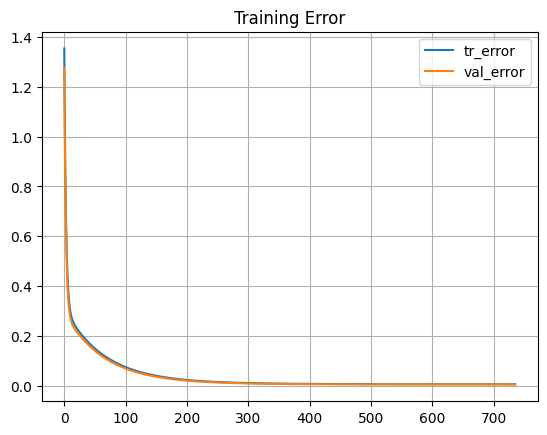

In [ ]:
multy_plot([stats['training_error'], stats['validation_error']], ['tr_error', 'val_error'], 'Training Error')

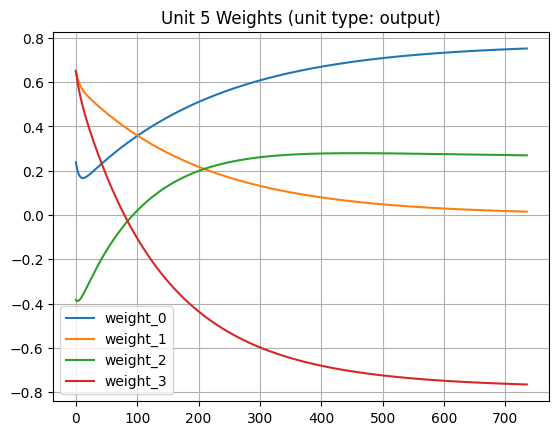

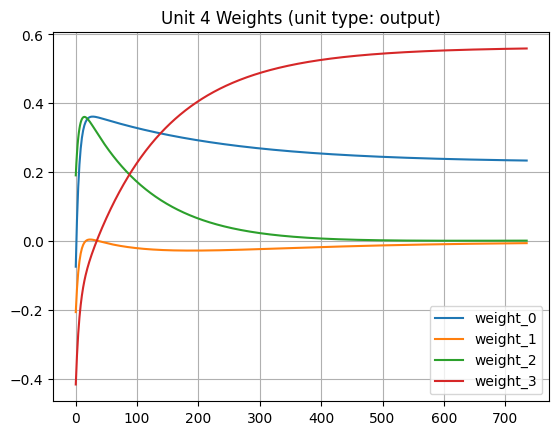

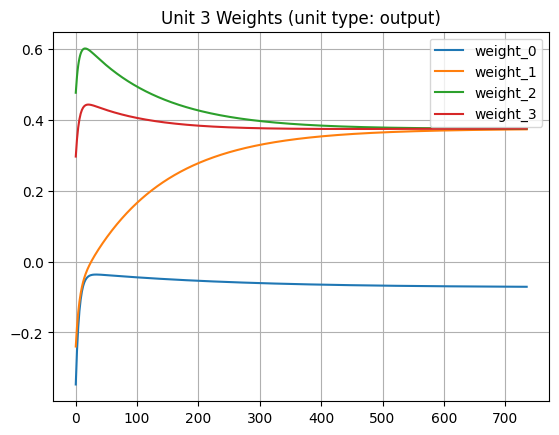

In [ ]:
for unit_index in stats['units_weights'].keys():
    vals = np.array(stats['units_weights'][unit_index]).T
    multy_plot(vals, 
               ['weight_' + str(i) for i in range(len(vals))], 
               'Unit ' + str(unit_index) + ' Weights (unit type: ' + NN.neurons[unit_index].type + ')')

In [ ]:
tr_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,output_1,output_2,output_3,prediction_1,prediction_2,prediction_3,prediction_1_err,prediction_2_err,prediction_3_err
144,-9.507814,-7.065543,7.989526,24.457899,-2826.086637,-6.583832,23.986316,-1888.708476,-6.604714,0.222391,878677.817555,0.000436
833,4.901076,3.983327,-0.217138,-7.719901,275.845085,10.667265,-7.349828,703.881394,10.659064,0.136954,183215.082263,0.000067
270,-4.355442,-7.950446,-2.506105,8.115881,-561.914626,-12.811994,7.329344,-949.452661,-12.783492,0.618640,150185.728300,0.000812
468,5.651247,-8.446045,-4.519016,-22.399786,186.766267,-5.313815,-22.691353,840.485381,-5.298773,0.085011,427348.680256,0.000226
962,-6.966656,-2.704203,-6.671284,21.195766,-1048.928991,-14.342143,20.198585,-1405.406165,-14.281998,0.994370,127075.975613,0.003617


In [ ]:
val_df.sample(5, random_state=RANDOM_STATE)

,input_1,input_2,input_3,output_1,output_2,output_3,prediction_1,prediction_2,prediction_3,prediction_1_err,prediction_2_err,prediction_3_err
1052,7.274040,-8.058143,5.358667,-26.880263,831.976286,6.574565,-26.484693,1111.650433,6.526665,0.156476,78217.628684,0.002294
1157,-8.370484,2.360876,5.707484,30.472329,-1785.302772,1.697876,30.289561,-1677.220031,1.688054,0.033404,11681.878883,0.000096
1135,5.037616,7.890774,8.698532,-4.222075,74.205927,23.626922,-3.183615,713.093939,23.565422,1.078399,408177.892546,0.003782
1140,-7.095906,-2.108666,-5.960705,22.179053,-1092.109160,-13.165278,21.236847,-1429.562902,-13.109014,0.887752,113875.028048,0.003166
1056,-3.930807,8.685863,1.046533,23.478285,-557.428690,7.801588,23.539820,-873.070958,7.808486,0.003787,99630.041365,0.000048


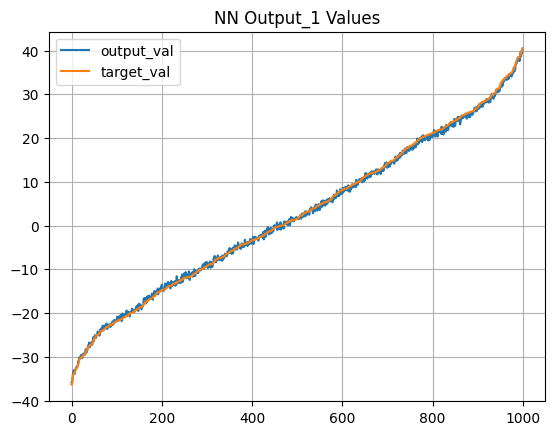

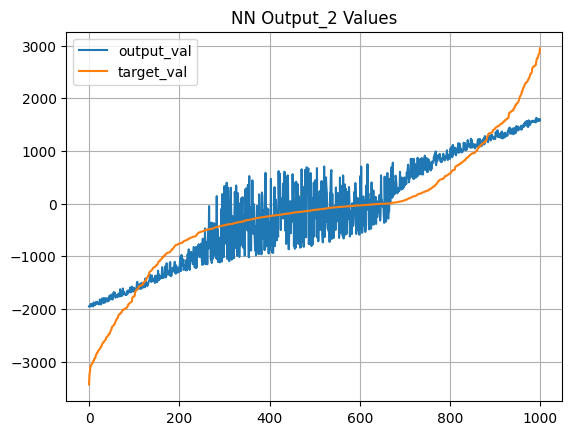

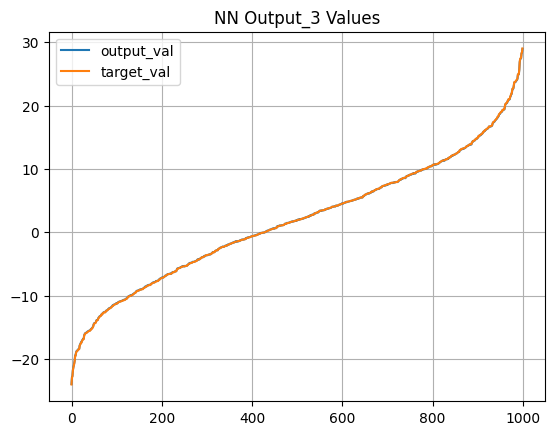

In [ ]:
for i in range(TR_INPUT):
    sorted_order = training_set[:, TR_INPUT + i].argsort()
    multy_plot([tr_predictions[sorted_order][:,i] , training_set[sorted_order][:,TR_INPUT + i]], 
                ['output_val', 'target_val'], 
                'NN Output_' + str(i + 1) +  ' Values')

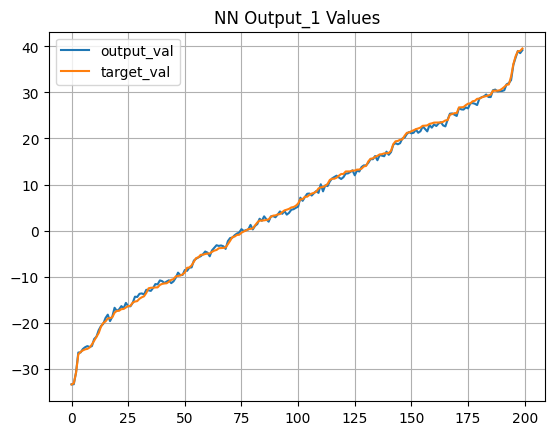

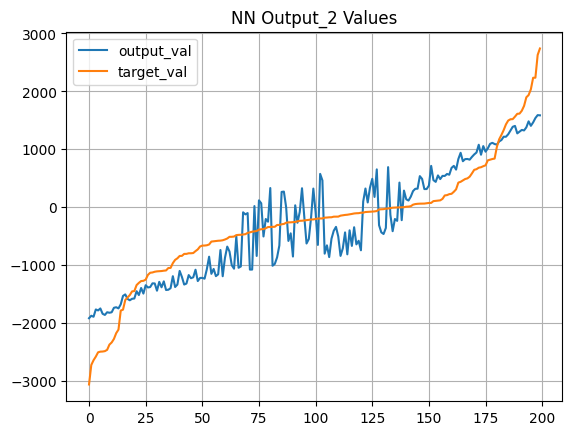

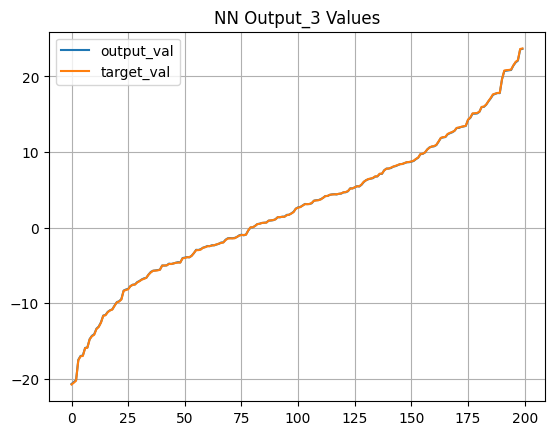

In [ ]:
for i in range(TR_INPUT):
    sorted_order = validation_set[:, TR_INPUT + i].argsort()
    multy_plot([val_predictions[sorted_order][:,i] , validation_set[sorted_order][:,TR_INPUT + i]], 
                ['output_val', 'target_val'], 
                'NN Output_' + str(i + 1) +  ' Values')

Tot points: 1000


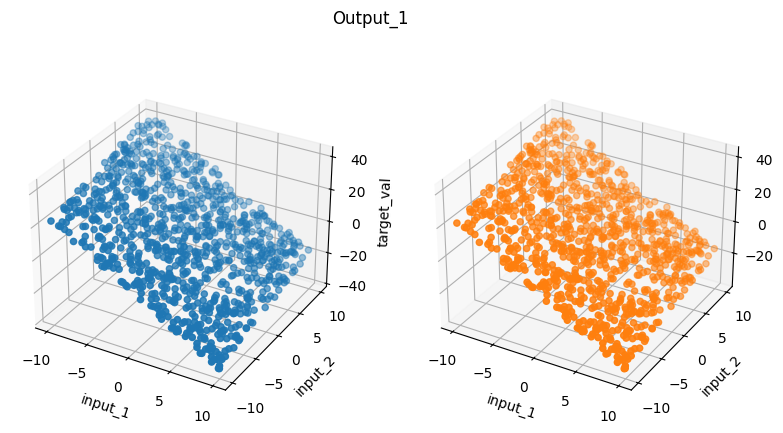

In [ ]:
multy_plot_3d([training_set[:,0], training_set[:,0]], 
              [training_set[:,1], training_set[:,1]],
              [training_set[:,TR_INPUT], tr_predictions[:,0]],
              [['input_1', 'input_2', 'target_val'], ['input_1', 'input_2', 'output_val']],
              'Output_1');

Tot points: 1000


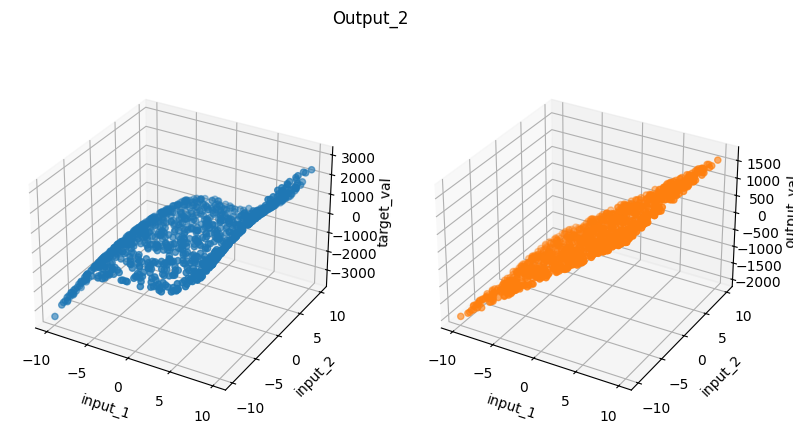

In [ ]:
multy_plot_3d([training_set[:,0], training_set[:,0]], 
              [training_set[:,1], training_set[:,1]],
              [training_set[:,TR_INPUT + 1], tr_predictions[:,1]],
              [['input_1', 'input_2', 'target_val'], ['input_1', 'input_2', 'output_val']],
              'Output_2');

In [ ]:
interactive_3d_plot(tr_df_normalized, 'input_1', 'input_2', 'prediction_2', 'prediction_2_err')

Tot points: 1000


In [ ]:
interactive_3d_plot(tr_df_normalized, 'input_1', 'input_2', 'output_2', 'prediction_2_err')

Tot points: 1000


In [ ]:
interactive_3d_plot(val_df_normalized, 'input_1', 'input_2', 'prediction_2', 'prediction_2_err')

Tot points: 200


In [ ]:
interactive_3d_plot(val_df_normalized, 'input_1', 'input_2', 'output_2', 'prediction_2_err')

Tot points: 200
